In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_dir = "../simulations/"

In [5]:
#r_list = ['0.0', '0.1', '1.0', '10.0', '100.0']
#r_list = np.logspace(-1,2,10)[:-1]
r_list = np.insert(np.logspace(-1,3,13), 0, 0.0)
print(r_list)
n_r = len(r_list)
n_samples = 100
x = np.arange(1, n_samples) / n_samples
x_fold = x[:n_samples//2]
pi_weight = 2*(x_fold)*(1 - x_fold)
print(pi_weight)

[  0.00000000e+00   1.00000000e-01   2.15443469e-01   4.64158883e-01
   1.00000000e+00   2.15443469e+00   4.64158883e+00   1.00000000e+01
   2.15443469e+01   4.64158883e+01   1.00000000e+02   2.15443469e+02
   4.64158883e+02   1.00000000e+03]
[ 0.0198  0.0392  0.0582  0.0768  0.095   0.1128  0.1302  0.1472  0.1638
  0.18    0.1958  0.2112  0.2262  0.2408  0.255   0.2688  0.2822  0.2952
  0.3078  0.32    0.3318  0.3432  0.3542  0.3648  0.375   0.3848  0.3942
  0.4032  0.4118  0.42    0.4278  0.4352  0.4422  0.4488  0.455   0.4608
  0.4662  0.4712  0.4758  0.48    0.4838  0.4872  0.4902  0.4928  0.495
  0.4968  0.4982  0.4992  0.4998  0.5   ]


In [6]:
sim = 'a-2.0'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4

mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_kingman = jMAF_fold
mMAF_kingman = mMAF_fold
ratio_kingman = ratio_fold
pi_kingman = np.dot(mMAF_fold, pi_weight)


PMI_kingman = np.log2(ratio_fold)
wPMI_kingman = jMAF_kingman*PMI_kingman
diag_kingman = np.diagonal(wPMI_kingman, axis1=1, axis2=2)
offdiag_kingman = (np.sum(wPMI_kingman, axis=2) - diag_kingman)

In [34]:
sim = 'a-1.75'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_mmc = jMAF_fold
mMAF_mmc = mMAF_fold
pi_mmc = np.dot(mMAF_fold, pi_weight)
#PMI_mmc = jMAF_fold * np.log2(ratio_fold)
PMI_mmc = np.log2(ratio_fold)
wPMI_mmc = jMAF_mmc*PMI_mmc
diag_mmc = np.diagonal(wPMI_mmc, axis1=1, axis2=2)
offdiag_mmc = (np.sum(wPMI_mmc, axis=2) - diag_mmc)

/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [18]:
sim = 'a-1.01'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    filecount = 0.0
    for rep in range(10):
        fn = 'jsfs_{}_r-{}_rep-{}.txt'.format(sim, r, rep)
        try:
            datafile = open(data_dir + fn)
        except FileNotFoundError:
            continue
        filecount += 1
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] += np.array(line.split(), dtype=float)
                jMAF_triu[i,:] += np.array(datafile.readline().split(), dtype=float)
                break
        datafile.close()
    mMAF[i,:] /= filecount
    jMAF_triu[i,:] /= filecount
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_bsc = jMAF_fold
mMAF_bsc = mMAF_fold
pi_bsc = np.dot(mMAF_fold, pi_weight)
#PMI_bsc = jMAF_fold * np.log2(ratio_fold)
PMI_bsc = np.log2(ratio_fold)
wPMI_bsc = jMAF_bsc*PMI_bsc
diag_bsc = np.diagonal(wPMI_bsc, axis1=1, axis2=2)
offdiag_bsc = (np.sum(wPMI_bsc, axis=2) - diag_bsc)

/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [19]:
sim = 'T-0.01_S-0.1'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_step = jMAF_fold
mMAF_step = mMAF_fold
pi_step = np.dot(mMAF_fold, pi_weight)
#PMI_step = jMAF_fold * np.log2(ratio_fold)
PMI_step = np.log2(ratio_fold)
wPMI_step = jMAF_step*PMI_step
diag_step = np.diagonal(wPMI_step, axis1=1, axis2=2)
offdiag_step = (np.sum(wPMI_step, axis=2) - diag_step)

In [41]:
sim = 'g-1.0'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_exp = jMAF_fold
mMAF_exp = mMAF_fold
pi_exp = np.dot(mMAF_fold, pi_weight)
#PMI_exp = jMAF_fold * np.log2(ratio_fold)
PMI_exp = np.log2(ratio_fold)
wPMI_exp = jMAF_exp*PMI_exp
diag_exp = np.diagonal(wPMI_exp, axis1=1, axis2=2)
offdiag_exp = (np.sum(wPMI_exp, axis=2) - diag_exp)

In [42]:
print(pi_kingman)
print(pi_mmc)
print(pi_bsc)
print(pi_step)
print(pi_exp)

[ 1.97984264  1.9797683   1.97754926  1.98272966  1.98210526  1.98166954
  1.98094112  1.9815702   1.97896617  1.9827001   1.98249799  1.98372225
  1.97812777  1.97753019]
[ 1.97110536  1.98228399  1.98333811  1.98189575  1.98076587  1.98037976
  1.97932809  1.97611307  1.98092529  1.9787707   1.97575726  1.97859364
  0.          0.        ]
[ 1.98079169  1.98338896  1.98284297  1.97304608  1.98112801  1.98104831
  1.9728746   1.97987245  1.98602637  1.98066997  1.97861487         nan
         nan         nan]
[ 0.21565633  0.21543942  0.21645102  0.21604638  0.21575282  0.21559892
  0.21616343  0.21560943  0.21570309  0.21584888  0.21597416  0.21559415
  0.21557459  0.21547297]
[ 1.17927139  1.18122782  1.18135988  1.17968876  1.18055833  1.18012606
  1.1815939   1.18114718  1.17975976  1.18044292  1.18198702  1.18160852
  1.18205384  1.17963791]


# wPMI

0.0


/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


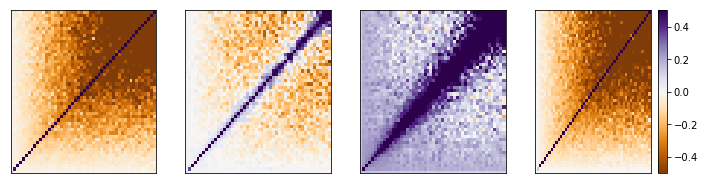

0.1


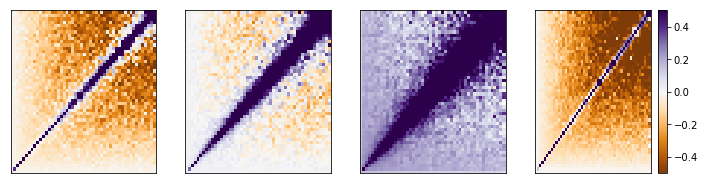

0.215443469003


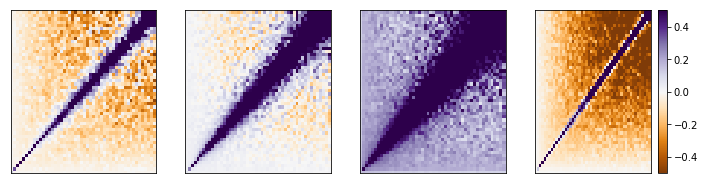

0.464158883361


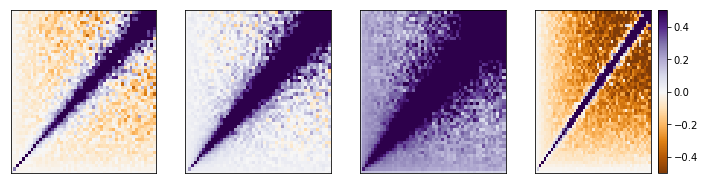

1.0


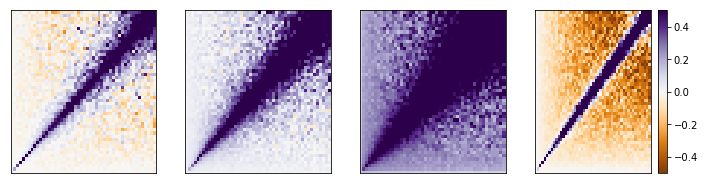

2.15443469003


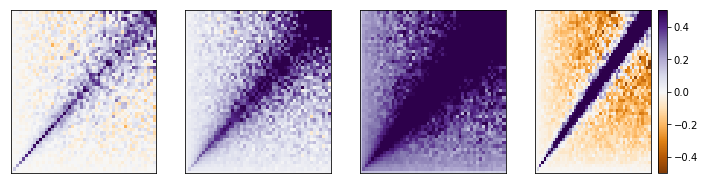

4.64158883361


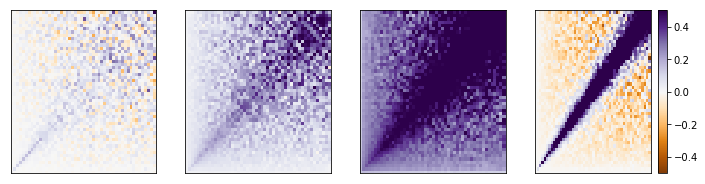

10.0


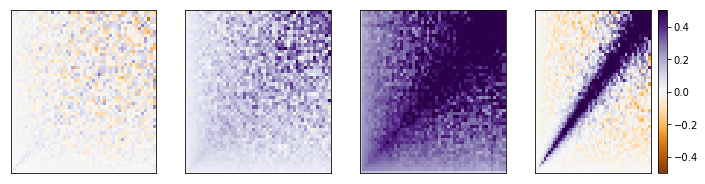

21.5443469003


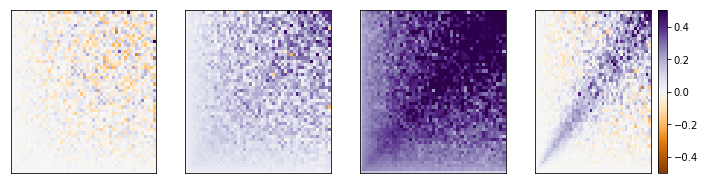

46.4158883361


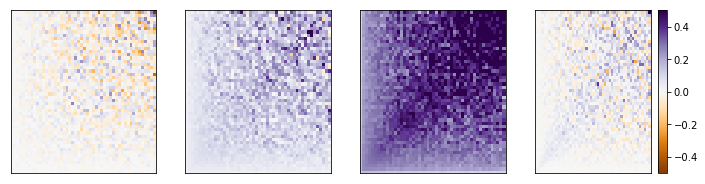

100.0


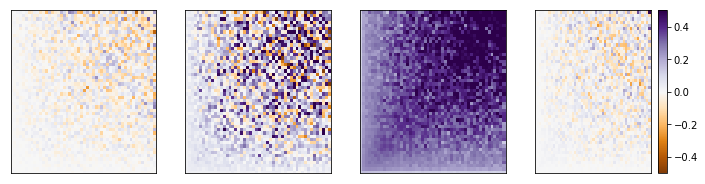

215.443469003


/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


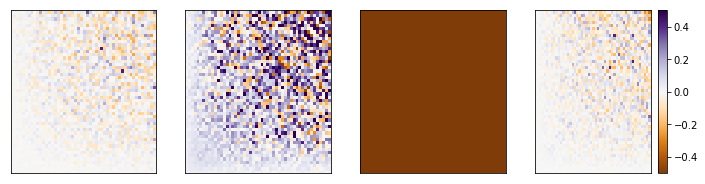

464.158883361


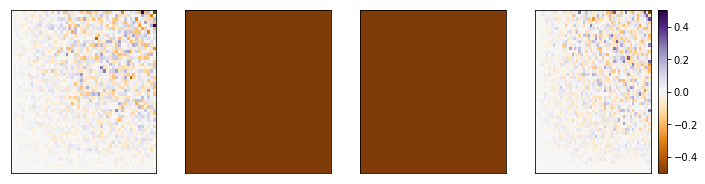

1000.0


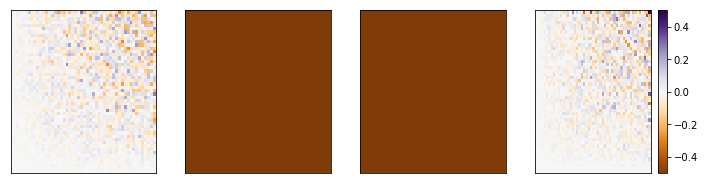

In [29]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(12,3))
    ax = plt.subplot(1,4,1)
    plt.pcolor(PMI_kingman[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = plt.subplot(1,4,2)
    plt.pcolor(PMI_mmc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    ax.set_xticks([])
    ax.set_yticks([])


    ax = plt.subplot(1,4,3)
    plt.pcolor(PMI_bsc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    ax.set_xticks([])
    ax.set_yticks([])


    ax = plt.subplot(1,4,4)
    plt.pcolor(PMI_step[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    ax.set_xticks([])
    ax.set_yticks([])


    plt.colorbar()
    plt.savefig('pmi_{}.pdf'.format(r))
    plt.show()

0.0


/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


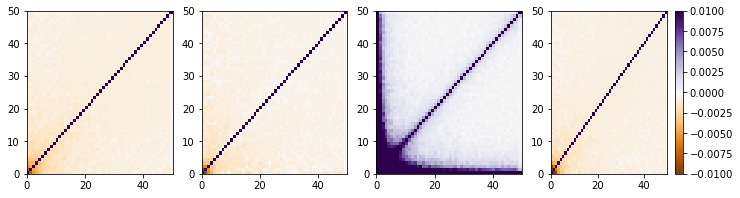

0.1


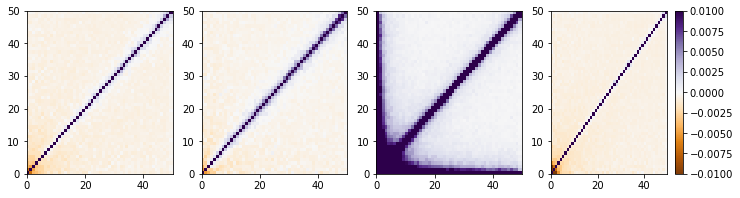

0.215443469003


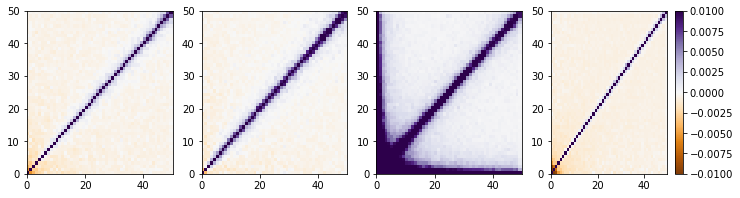

0.464158883361


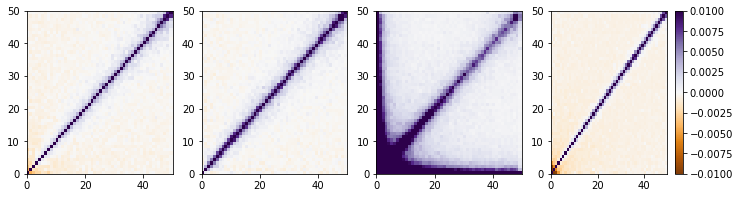

1.0


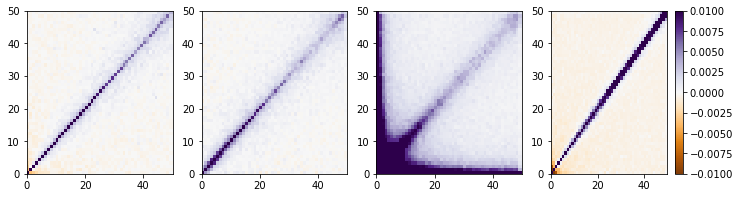

2.15443469003


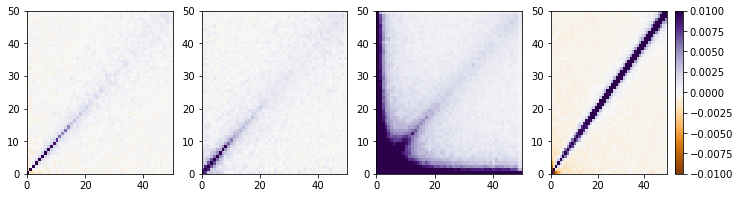

4.64158883361


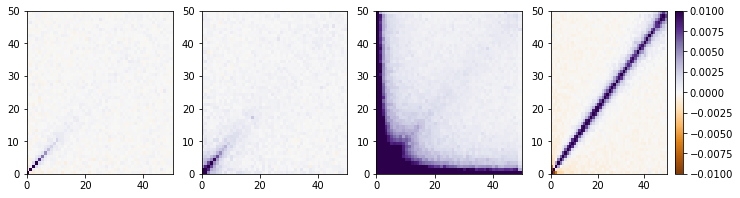

10.0


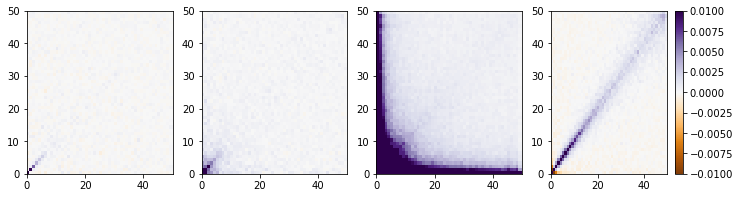

21.5443469003


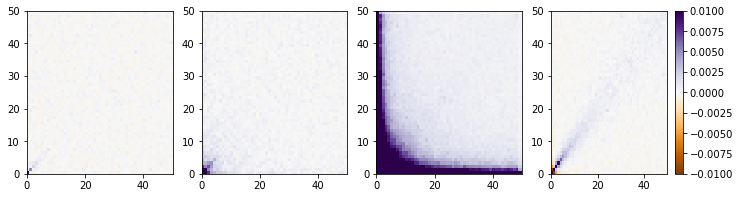

46.4158883361


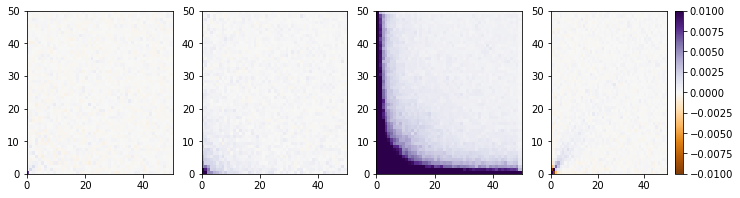

100.0


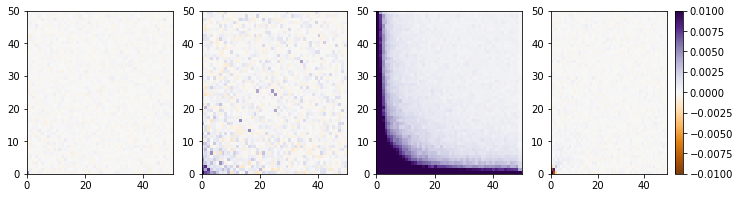

215.443469003


/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


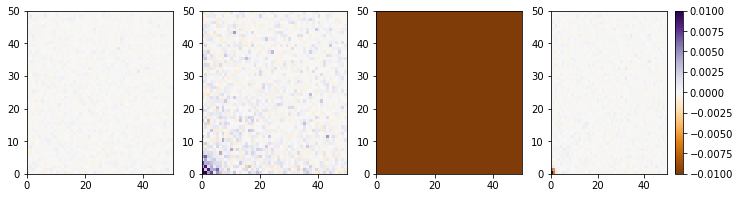

464.158883361


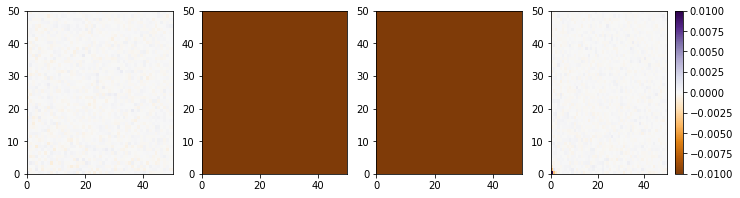

1000.0


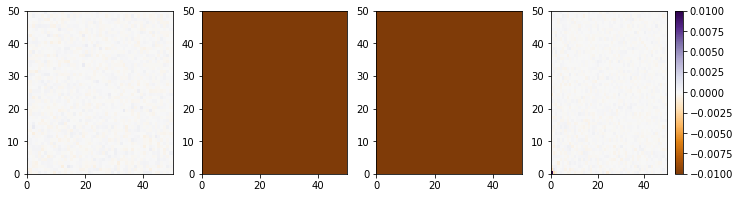

In [22]:
vext=0.01
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(12,3))
    ax = plt.subplot(1,4,1)
    plt.pcolor(wPMI_kingman[i,:,:]/pi_kingman[i]**2, vmin=-vext, vmax=vext, cmap='PuOr')
    
    ax = plt.subplot(1,4,2)
    ax.pcolor(wPMI_mmc[i,:,:]/pi_mmc[i]**2, vmin=-vext, vmax=vext, cmap='PuOr')
    
    ax = plt.subplot(1,4,3)
    plt.pcolor(wPMI_bsc[i,:,:]/pi_bsc[i]**2, vmin=-vext, vmax=vext, cmap='PuOr')
    
    ax = plt.subplot(1,4,4)
    plt.pcolor(wPMI_step[i,:,:]/pi_step[i]**2, vmin=-vext, vmax=vext, cmap='PuOr')


    plt.colorbar()

    #plt.colorbar()
    plt.show()

/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


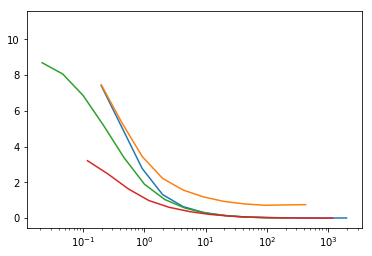

In [23]:
plt.semilogx(r_list*pi_kingman, np.sum(wPMI_kingman,axis=(1,2))/pi_kingman**2)
plt.semilogx(r_list*pi_mmc, np.sum(wPMI_mmc,axis=(1,2))/pi_mmc**2)
plt.semilogx(r_list*pi_step, np.sum(wPMI_step,axis=(1,2))/pi_step**2)
plt.semilogx(r_list*pi_exp, np.sum(wPMI_exp,axis=(1,2))/pi_exp**2)


plt.show()

/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


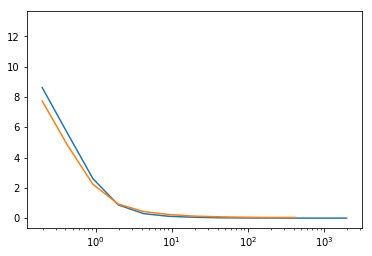

In [24]:
plt.semilogx(r_list*pi_kingman, np.sum(diag_kingman,axis=1)/pi_kingman**2)
plt.semilogx(r_list*pi_mmc, np.sum(diag_mmc,axis=1)/pi_mmc**2)
#plt.semilogx(r_list*pi_bsc, np.sum(diag_bsc,axis=1)/pi_mmc**2)



#plt.semilogx(r_list*pi_mmc, np.sum(wPMI_mmc,axis=(1,2))/pi_mmc**2)
#plt.semilogx(r_list*pi_step, np.sum(wPMI_step,axis=(1,2))/pi_step**2)
plt.show()

/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


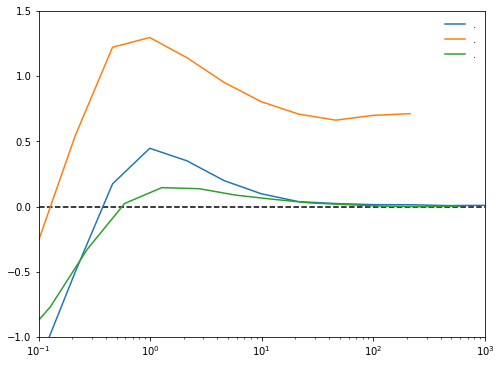

In [46]:
plt.figure(figsize=(8,6))
plt.semilogx(r_list*pi_kingman/2, np.sum(offdiag_kingman,axis=1)/pi_kingman**2, label='.')
plt.semilogx(r_list*pi_mmc/2, np.sum(offdiag_mmc,axis=1)/pi_mmc**2, label='.')
#plt.semilogx(r_list*pi_bsc, np.sum(offdiag_bsc,axis=1)/pi_bsc**2)
#plt.semilogx(r_list*pi_step, np.sum(offdiag_step,axis=1)/pi_step**2)
plt.semilogx(r_list*pi_exp/2, np.sum(offdiag_exp,axis=1)/pi_exp**2, label='.')

plt.hlines(0, 1e-1, 1e3, linestyle='dashed')
plt.xlim([1e-1,1e3])
plt.ylim([-1,1.5])

plt.legend()
#plt.semilogx(r_list*pi_mmc, np.sum(wPMI_mmc,axis=(1,2))/pi_mmc**2)
#plt.semilogx(r_list*pi_step, np.sum(wPMI_step,axis=(1,2))/pi_step**2)
plt.savefig('bmi_vs_r_mmc_kingman_exp.pdf')
plt.show()

## Exponential growth

1.0 1.1792713915
2.0 0.913762950358
4.0 0.663227725527
8.0 0.455302226234


/Users/danielrice/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


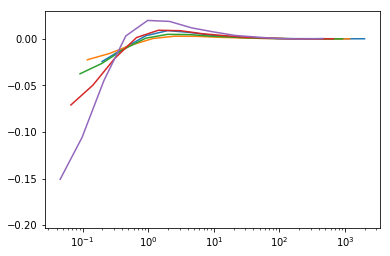

In [39]:
plt.plot(r_list*pi_kingman, np.mean(offdiag_kingman, axis=1)/pi_kingman**2, label='Kingman')

for g in [1.0, 2.0, 4.0, 8.0]:
    sim = 'g-{}'.format(g)
    mMAF = np.zeros((n_r, n_samples-1))
    jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
    for i, r in enumerate(r_list):
        fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
        with open(data_dir + fn) as datafile:
            for line in datafile:
                if line.startswith('#'):
                    continue
                else:
                    mMAF[i,:] = np.array(line.split(), dtype=float)
                    jMAF_triu[i,:] = np.array(datafile.readline().split())
                    break

    jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
    for i in range(n_r):
        jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
        jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
    jMAF += np.transpose(jMAF, axes=(0,2,1))

    mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
    mMAF_fold[:,-1] /= 2

    jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
    jMAF_fold[:,-1,:-1] /= 2
    jMAF_fold[:,:-1,-1] /= 2
    jMAF_fold[:,-1,-1] /= 4

    mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
    ratio_fold = jMAF_fold / mMAF_sq_fold

    pi_exp = np.dot(mMAF_fold, pi_weight)
    PMI_exp = np.log2(ratio_fold)
    diag_exp = np.diagonal(wPMI_exp, axis1=1, axis2=2)
    offdiag_exp = (np.sum(wPMI_exp, axis=2) - diag_exp) / (n_samples/2 - 1)
    
    plt.semilogx(r_list*pi_exp, np.sum(offdiag_exp, axis=1)/pi_exp**2, label=g)
    print(g, pi_exp[0])
#plt.semilogx(r_list*pi_mmc/2, np.sum(offdiag_mmc,axis=1)/pi_mmc**2)
#plt.ylim([-0.09,1.5])
#plt.legend()
plt.show()